In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fraud = pd.read_csv("C:/Users/bhand/OneDrive/Desktop/Fraud Detection/Fraud.csv")

In [3]:
fraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
fraud.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
fraud.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
fraud.nunique().sort_values(ascending=True)

isFraud                 2
isFlaggedFraud          2
type                    5
step                  743
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
newbalanceDest    3555499
oldbalanceDest    3614697
amount            5316900
nameOrig          6353307
dtype: int64

In [9]:
target = 'isFraud'
features = [feature for feature in fraud.columns if feature not in [target]]

In [10]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
import seaborn as sns

<Axes: ylabel='count'>

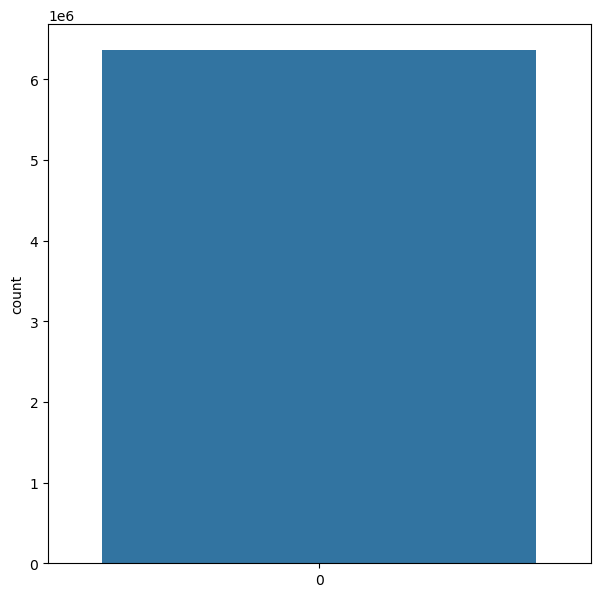

In [13]:
plt.figure(figsize=[7, 7])
sns.countplot(fraud[target])
  


In [14]:
fraud[target].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [15]:
fraud.groupby([target, 'type']).size().unstack(fill_value=0)

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1399284,2233384,41432,2151495,528812
1,0,4116,0,0,4097


<Axes: ylabel='count'>

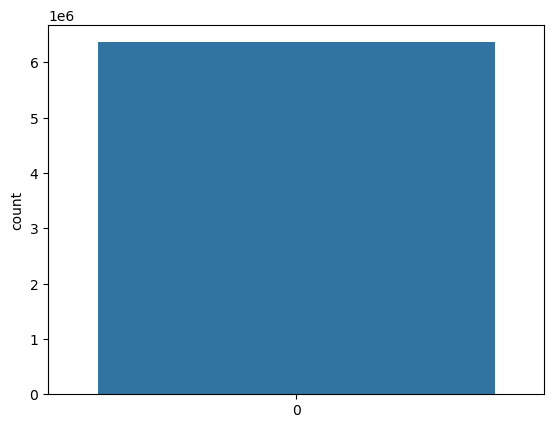

In [16]:
sns.countplot(fraud['isFlaggedFraud'])

In [17]:
fraud['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

C:\Users\bhand\AppData\Local\Temp\ipykernel_13324\214657496.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud['amount'], color='b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)


<Axes: xlabel='amount', ylabel='Density'>

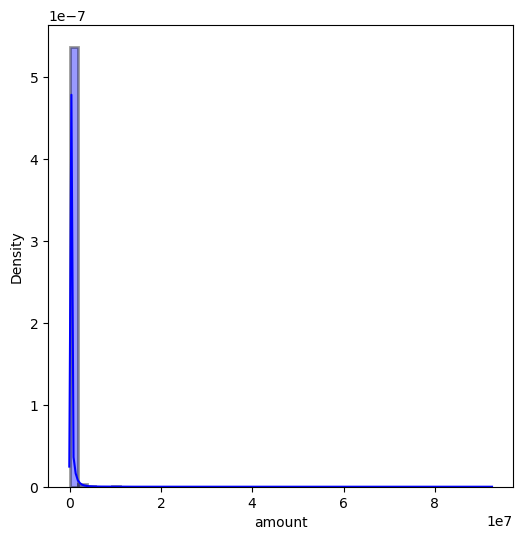

In [18]:
plt.figure(figsize=[6, 6])
sns.distplot(fraud['amount'], color='b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)

<Axes: >

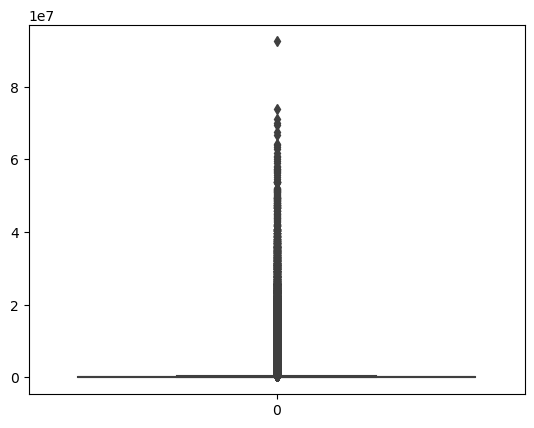

In [19]:
sns.boxplot(fraud['amount'])

In [20]:
fraud['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [21]:
from scipy.stats import zscore
fraud[target].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [22]:
fraud[np.abs(zscore(fraud['amount'])) < 3][target].value_counts()

0    6311148
1       6527
Name: isFraud, dtype: int64

C:\Users\bhand\AppData\Local\Temp\ipykernel_13324\496285735.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud['oldbalanceOrg'], color='b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)


<Axes: xlabel='oldbalanceOrg', ylabel='Density'>

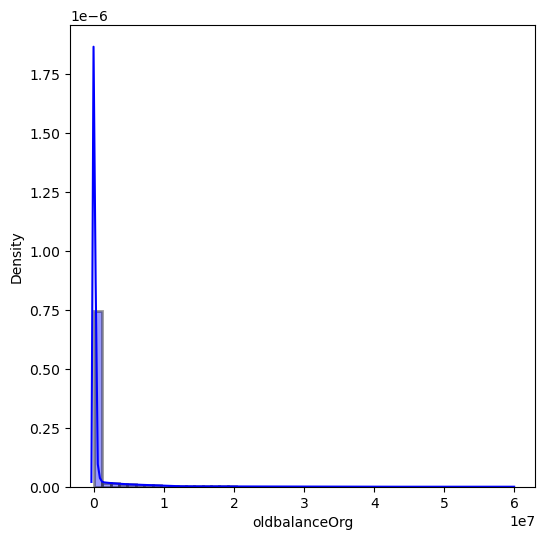

In [23]:
plt.figure(figsize=[6, 6])
sns.distplot(fraud['oldbalanceOrg'], color='b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)

<Axes: >

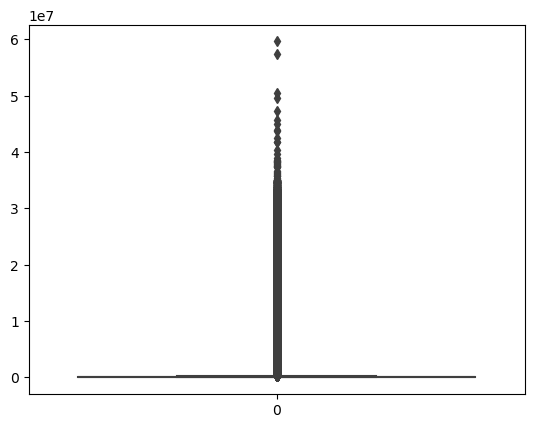

In [24]:
sns.boxplot(fraud['oldbalanceOrg'])

In [25]:
fraud['oldbalanceOrg'].describe()

count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

In [26]:
fraud[target].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [27]:
fraud[np.abs(zscore(fraud['oldbalanceOrg'])) < 3][target].value_counts()

0    6199579
1       7901
Name: isFraud, dtype: int64

In [28]:
fraud[np.abs(zscore(fraud['oldbalanceOrg'])) < 3].shape

(6207480, 11)

In [29]:
fraud.shape

(6362620, 11)

In [30]:
fraud = fraud[np.abs(zscore(fraud['oldbalanceOrg'])) < 3]

C:\Users\bhand\AppData\Local\Temp\ipykernel_13324\2118283755.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud['newbalanceOrig'], color='b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)


<Axes: xlabel='newbalanceOrig', ylabel='Density'>

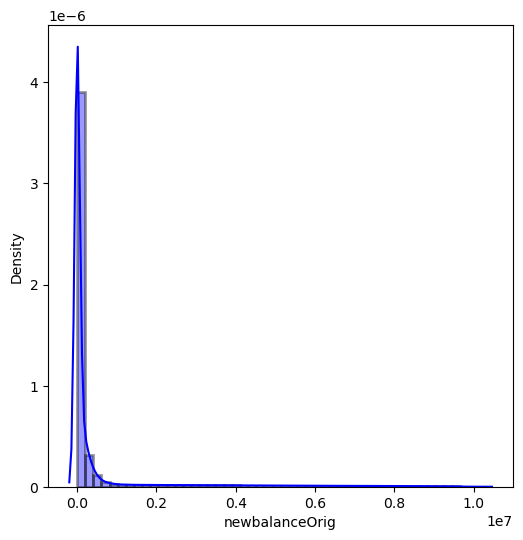

In [31]:
plt.figure(figsize=[6, 6])
sns.distplot(fraud['newbalanceOrig'], color='b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)

<Axes: >

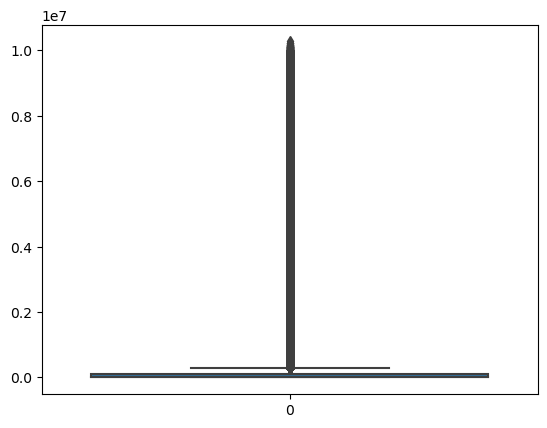

In [32]:
sns.boxplot(fraud['newbalanceOrig'])

In [33]:
fraud[target].value_counts()

0    6199579
1       7901
Name: isFraud, dtype: int64

In [34]:
fraud[np.abs(zscore(fraud['newbalanceOrig'])) < 3][target].value_counts()

0    5969852
1       7899
Name: isFraud, dtype: int64

In [35]:
fraud.shape


(6207480, 11)

In [36]:
fraud = fraud[np.abs(zscore(fraud['newbalanceOrig'])) < 3]

In [37]:
fraud.shape

(5977751, 11)

In [38]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


C:\Users\bhand\AppData\Local\Temp\ipykernel_13324\2138216143.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud['oldbalanceDest'], color = 'b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)


<Axes: xlabel='oldbalanceDest', ylabel='Density'>

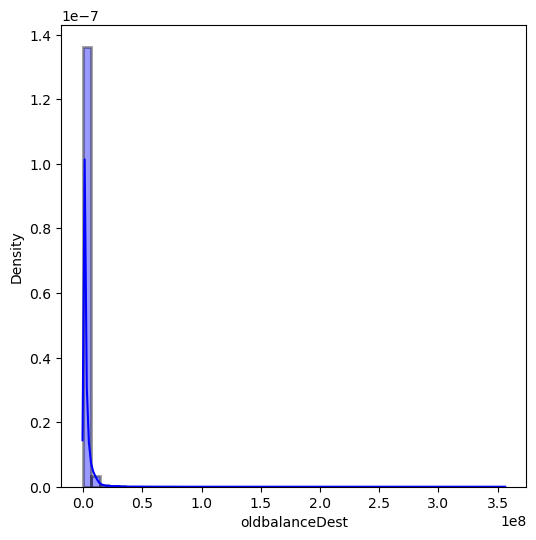

In [39]:
plt.figure(figsize=[6, 6])
sns.distplot(fraud['oldbalanceDest'], color = 'b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)

In [40]:
fraud.loc[fraud['nameDest'].str.startswith('M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [41]:
fraud.loc[~fraud['nameDest'].str.startswith('M')]['oldbalanceDest'].describe()

count    3.826402e+06
mean     1.632251e+06
std      4.071666e+06
min      0.000000e+00
25%      1.165770e+05
50%      5.218018e+05
75%      1.650417e+06
max      3.560159e+08
Name: oldbalanceDest, dtype: float64

In [42]:
fraud.loc[~fraud['nameDest'].str.startswith('M')]['newbalanceDest'].describe()

count    3.826402e+06
mean     1.853100e+06
std      4.423903e+06
min      0.000000e+00
25%      2.242694e+05
50%      6.858243e+05
75%      1.908355e+06
max      3.561793e+08
Name: newbalanceDest, dtype: float64

In [43]:
med_oldbalanceDest = fraud[~fraud['nameDest'].str.startswith('M')]['oldbalanceDest'].median()
fraud.loc[fraud['nameDest'].str.startswith('M'), 'oldbalanceDest'] = med_oldbalanceDest

In [44]:
med_newbalanceDest = fraud[~fraud['nameDest'].str.startswith('M')]['newbalanceDest'].median()
fraud.loc[fraud['nameDest'].str.startswith('M'), 'newbalanceDest'] = med_newbalanceDest

In [45]:
fraud['isFlaggedFraud'].value_counts()

0    5977743
1          8
Name: isFlaggedFraud, dtype: int64

In [46]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,521801.835,685824.345,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,521801.835,685824.345,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,521801.835,685824.345,0,0


In [47]:
display(fraud.describe())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.977751e+06,5.977751e+06,5.977751e+06,5.977751e+06,5.977751e+06,5.977751e+06,5.977751e+06,5.977751e+06
mean,2.435811e+02,1.804237e+05,2.148974e+05,2.275171e+05,1.232609e+06,1.433006e+06,1.321400e-03,1.338296e-06
std,1.424990e+02,6.181132e+05,6.811729e+05,7.142910e+05,3.300919e+06,3.583486e+06,3.632704e-02,1.156847e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.244322e+04,0.000000e+00,0.000000e+00,3.098470e+05,4.393596e+05,0.000000e+00,0.000000e+00
50%,2.390000e+02,6.839515e+04,1.091000e+04,0.000000e+00,5.218018e+05,6.858243e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.064838e+05,7.212165e+04,8.192764e+04,8.568732e+05,1.057022e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,9.468064e+06,4.916134e+06,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [48]:
fraud['oldbalanceOrg'].value_counts()

0.00         2102449
184.00           918
133.00           914
195.00           912
164.00           909
              ...   
8232.03            1
500665.47          1
130969.88          1
270587.15          1
170136.00          1
Name: oldbalanceOrg, Length: 1461191, dtype: int64

In [49]:
fraud['newbalanceOrig'].value_counts()

0.00         3609402
698.06             4
3420.22            4
15515.98           4
5317.90            4
              ...   
601732.44          1
29460.17           1
280088.20          1
521801.24          1
510167.71          1
Name: newbalanceOrig, Length: 2297957, dtype: int64

In [50]:
fraud.loc[fraud['oldbalanceOrg'] == 0.0, :]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
29,1,PAYMENT,9920.52,C764826684,0.0,0.0,M1940055334,521801.835,685824.345,0,0
30,1,PAYMENT,3448.92,C2103763750,0.0,0.0,M335107734,521801.835,685824.345,0,0
31,1,PAYMENT,4206.84,C215078753,0.0,0.0,M1757317128,521801.835,685824.345,0,0
32,1,PAYMENT,5885.56,C840514538,0.0,0.0,M1804441305,521801.835,685824.345,0,0
33,1,PAYMENT,5307.88,C1768242710,0.0,0.0,M1971783162,521801.835,685824.345,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6356052,709,CASH_OUT,123403.11,C1054278487,0.0,0.0,C1948756721,606875.620,730278.740,0,0
6356244,709,PAYMENT,14499.40,C1009494758,0.0,0.0,M840318507,521801.835,685824.345,0,0
6362461,730,CASH_OUT,0.00,C729003789,0.0,0.0,C1388096959,1008609.530,1008609.530,1,0
6362463,730,CASH_OUT,0.00,C2088151490,0.0,0.0,C1156763710,0.000,0.000,1,0


In [51]:
fraud.loc[fraud['newbalanceOrig'] == 0.0, :]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.000,0.000,1,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.0,M1176932104,521801.835,685824.345,0,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.0,C997608398,10845.000,157982.120,0,0
13,1,PAYMENT,11633.76,C1716932897,10127.00,0.0,M801569151,521801.835,685824.345,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.000,339682.130,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.000,0.000,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.840,6379898.110,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.000,0.000,1,0


In [52]:
fraud.loc[fraud['oldbalanceOrg'] == 0, :].groupby(['type']).size()

type
CASH_IN       13464
CASH_OUT    1025799
DEBIT          6158
PAYMENT      774245
TRANSFER     282783
dtype: int64

In [53]:
fraud.loc[fraud['newbalanceOrig'] == 0, :].groupby(['type']).size()

type
CASH_OUT    1985058
DEBIT         11786
PAYMENT     1101124
TRANSFER     511434
dtype: int64

In [54]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,521801.835,685824.345,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,521801.835,685824.345,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,521801.835,685824.345,0,0


In [55]:
fraud.loc[(fraud['oldbalanceOrg'] == 0) & (fraud['nameOrig'].str.startswith('C')), :]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
29,1,PAYMENT,9920.52,C764826684,0.0,0.0,M1940055334,521801.835,685824.345,0,0
30,1,PAYMENT,3448.92,C2103763750,0.0,0.0,M335107734,521801.835,685824.345,0,0
31,1,PAYMENT,4206.84,C215078753,0.0,0.0,M1757317128,521801.835,685824.345,0,0
32,1,PAYMENT,5885.56,C840514538,0.0,0.0,M1804441305,521801.835,685824.345,0,0
33,1,PAYMENT,5307.88,C1768242710,0.0,0.0,M1971783162,521801.835,685824.345,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6356052,709,CASH_OUT,123403.11,C1054278487,0.0,0.0,C1948756721,606875.620,730278.740,0,0
6356244,709,PAYMENT,14499.40,C1009494758,0.0,0.0,M840318507,521801.835,685824.345,0,0
6362461,730,CASH_OUT,0.00,C729003789,0.0,0.0,C1388096959,1008609.530,1008609.530,1,0
6362463,730,CASH_OUT,0.00,C2088151490,0.0,0.0,C1156763710,0.000,0.000,1,0


In [56]:
fraud.loc[(fraud['oldbalanceOrg'] == 0) & (fraud['nameOrig'].str.startswith('C')), :].groupby([target, 'type']).size().unstack()

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,13464.0,1025762.0,6158.0,774245.0,282779.0
1,NaN,37.0,NaN,NaN,4.0


In [57]:
fraud.groupby([target, 'type']).size().unstack()

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1014941.0,2233336.0,41432.0,2151349.0,528794.0
1,NaN,3963.0,NaN,NaN,3936.0


In [58]:
fraud['nameOrig'].str.startswith('C').value_counts()

True    5977751
Name: nameOrig, dtype: int64

In [59]:
fraud[fraud['nameDest'].str.startswith('C') & fraud[target] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [60]:
fraud[target].value_counts()

0    5969852
1       7899
Name: isFraud, dtype: int64

In [61]:
fraud['nameDest_startswith_C'] = fraud['nameDest'].str.startswith('C')

In [62]:
fraud['nameDest_startswith_C'].value_counts()

True     3826402
False    2151349
Name: nameDest_startswith_C, dtype: int64

In [63]:
fraud.groupby([target, 'nameDest_startswith_C']).size().unstack()

nameDest_startswith_C,False,True
isFraud,,
0,2151349.0,3818503.0
1,NaN,7899.0


In [64]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_startswith_C
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,521801.835,685824.345,0,0,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,521801.835,685824.345,0,0,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.000,0.000,1,0,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.000,0.000,1,0,True
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,521801.835,685824.345,0,0,False


In [65]:
fraud.shape

(5977751, 12)

In [66]:
fraud['nameDest_startswith_C'].value_counts()

True     3826402
False    2151349
Name: nameDest_startswith_C, dtype: int64

In [67]:
from sklearn.preprocessing import OrdinalEncoder
fraud[['nameDest_startswith_C']] = OrdinalEncoder(categories=[[False, True]]).fit_transform(fraud[['nameDest_startswith_C']])

In [68]:
fraud = pd.get_dummies(fraud, columns=['type'], drop_first=True)

In [69]:
fraud.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,521801.835,685824.345,0,0,0.0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,521801.835,685824.345,0,0,0.0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.000,0.000,1,0,1.0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.000,0.000,1,0,1.0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,521801.835,685824.345,0,0,0.0,0,0,1,0


In [70]:
fraud.shape

(5977751, 15)

In [71]:
fraud = fraud.drop(['type_DEBIT', 'type_PAYMENT'], axis=1)

In [72]:
fraud.shape

(5977751, 13)

In [73]:
fraud.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,521801.835,685824.345,0,0,0.0,0,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,521801.835,685824.345,0,0,0.0,0,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.000,0.000,1,0,1.0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.000,0.000,1,0,1.0,1,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,521801.835,685824.345,0,0,0.0,0,0


In [74]:
from sklearn.model_selection import train_test_split

X = fraud.drop([target], axis=1)
y = fraud[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04, random_state=403)
X_train.reset_index(drop=True, inplace=True)

print('Original dataset size --> ({}, {})'.format(fraud.shape[0], fraud.shape[1]))
print('Training set size --> ({}, {})'.format(X_train.shape[0], X_train.shape[1]))
print('Testing set size --> ({}, {})'.format(X_test.shape[0], X_test.shape[1]))

Original dataset size --> (5977751, 13)
Training set size --> (5738640, 12)
Testing set size --> (239111, 12)


In [75]:
X_train.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
0,326,135133.31,C61320343,0.00,0.00,C1963516031,8712517.100,8847650.400,0,1.0,1,0
1,331,73347.99,C2061757673,3192660.12,3266008.12,C1569772715,2225085.510,2151737.510,0,1.0,0,0
2,158,23640.83,C414221900,76488.49,52847.66,M643441925,521801.835,685824.345,0,0.0,0,0
3,297,145320.16,C902269039,0.00,0.00,C973929404,865019.170,1010339.330,0,1.0,1,0
4,303,8090.13,C1325671735,0.00,0.00,M1391903739,521801.835,685824.345,0,0.0,0,0


In [76]:
X_test.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
5553832,383,1923.96,C1203784179,333702.0,331778.04,M1271216941,521801.835,685824.345,0,0.0,0,0
2100012,182,203441.22,C1562806737,413027.0,616468.22,C1273249706,110974.210,0.000,0,1.0,0,0
3238130,250,41072.26,C333228648,0.0,0.00,C869409487,390102.470,431174.730,0,1.0,1,0
6041580,490,7403.10,C1790040720,171295.0,163891.91,M1007199198,521801.835,685824.345,0,0.0,0,0
3312533,252,385925.08,C1067820710,8025.0,0.00,C95839844,172296.840,558221.920,0,1.0,1,0


In [77]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
print('---- Standardizing the training set -----')
X_train[['step', 'amount', 'oldbalanceOrg'
         , 'newbalanceOrig', 'oldbalanceDest',
         'newbalanceDest']] = std.fit_transform(X_train.loc[:, ['step',
                                              'amount',
                                              'oldbalanceOrg',
                                              'newbalanceOrig',
                                              'oldbalanceDest',
                                              'newbalanceDest']])
X_train_std = pd.DataFrame(X_train, columns=X_train.columns)
display(X_train_std.describe())

print('---- Standardizing the testing set ----')
X_test[['step', 'amount', 'oldbalanceOrg'
         , 'newbalanceOrig', 'oldbalanceDest',
         'newbalanceDest']] = std.transform(X_test.loc[:, ['step',
                                              'amount',
                                              'oldbalanceOrg',
                                              'newbalanceOrig',
                                              'oldbalanceDest',
                                              'newbalanceDest']])
X_test_std = pd.DataFrame(X_test, columns=X_train.columns)
display(X_test_std.describe())

---- Standardizing the training set -----


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
count,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06
mean,6.925843e-17,3.813696e-16,-1.385590e-16,1.537092e-16,-6.215132e-17,1.333945e-16,1.394059e-06,6.401287e-01,3.742648e-01,8.911049e-02
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.180702e-03,4.799625e-01,4.839325e-01,2.849032e-01
min,-1.702369e+00,-2.917342e-01,-3.154311e-01,-3.184930e-01,-3.733167e-01,-3.997586e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-6.146289e-01,-2.716150e-01,-3.154311e-01,-3.184930e-01,-2.795209e-01,-2.772117e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-3.216194e-02,-1.811341e-01,-2.994084e-01,-3.184930e-01,-2.152810e-01,-2.084228e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,6.415348e-01,4.221309e-02,-2.095451e-01,-2.037726e-01,-1.138998e-01,-1.049979e-01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,3.504746e+00,1.492141e+02,1.358705e+01,6.564968e+00,1.074516e+02,9.896949e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


---- Standardizing the testing set ----


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
count,239111.000000,239111.000000,239111.000000,239111.000000,239111.000000,239111.000000,239111.0,239111.000000,239111.000000,239111.000000
mean,-0.000336,0.001319,0.002864,0.001783,-0.000054,0.000773,0.0,0.639594,0.374420,0.089318
std,1.000297,0.990763,1.005075,1.003349,0.993335,0.993596,0.0,0.480119,0.483974,0.285203
min,-1.702369,-0.291734,-0.315431,-0.318493,-0.373317,-0.399759,0.0,0.000000,0.000000,0.000000
25%,-0.621647,-0.271495,-0.315431,-0.318493,-0.278375,-0.276643,0.0,0.000000,0.000000,0.000000
50%,-0.032162,-0.180879,-0.299458,-0.318493,-0.215281,-0.208423,0.0,1.000000,0.000000,0.000000
75%,0.641535,0.041696,-0.209239,-0.204023,-0.111134,-0.101503,0.0,1.000000,1.000000,0.000000
max,3.504746,90.685626,13.587048,6.564851,91.175447,83.944307,0.0,1.000000,1.000000,1.000000


C:\Users\bhand\AppData\Local\Temp\ipykernel_13324\2379104792.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fraud.corr(), annot=True, vmax=1, vmin=-1)


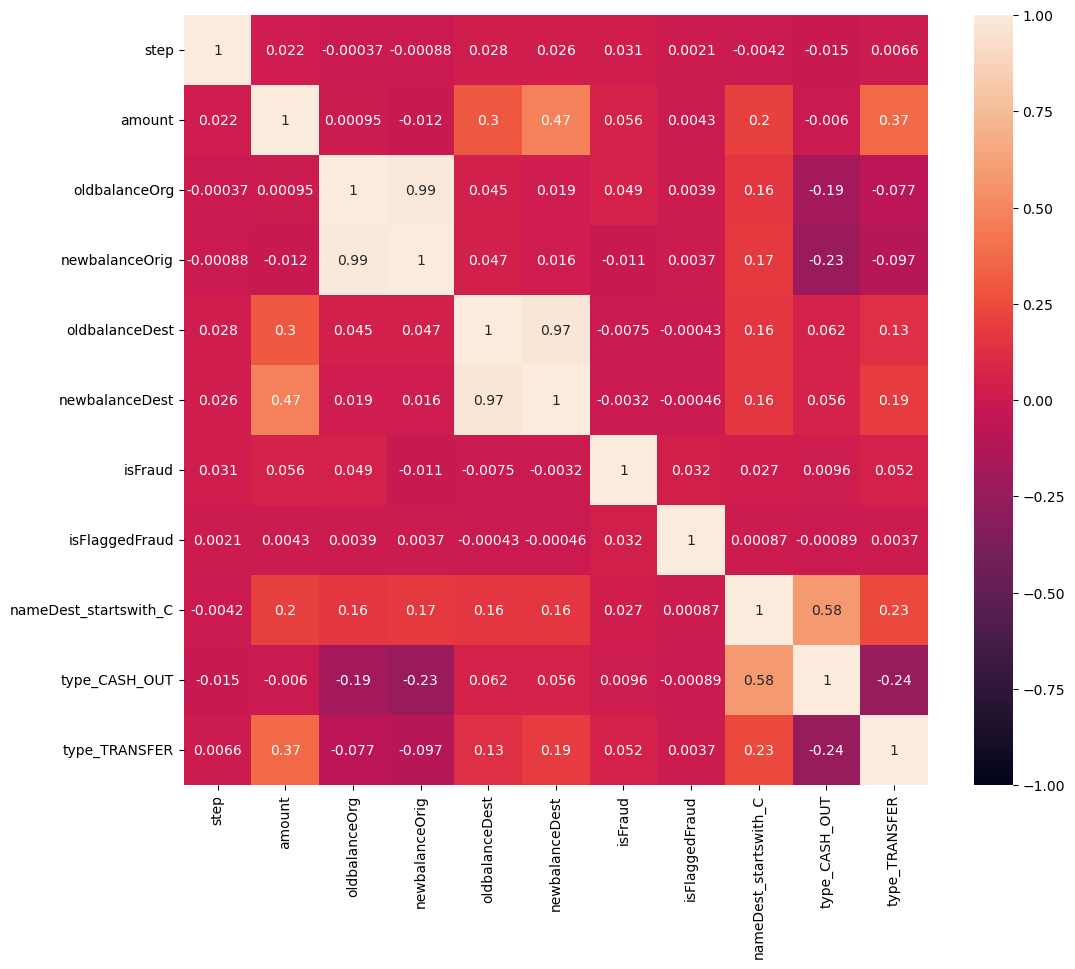

In [78]:
plt.figure(figsize=[12, 10])

sns.heatmap(fraud.corr(), annot=True, vmax=1, vmin=-1)
plt.show()

In [79]:
y_train_ = y_train.values
y_test_ = y_test.values

In [80]:
X_train_std.shape

(5738640, 12)

In [81]:
from sklearn.utils.class_weight import compute_class_weight
compute_class_weight(class_weight='balanced', classes=[0, 1], y = y_train_)

array([  0.50066157, 378.38850059])

In [82]:
X_train_std.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
0,0.578376,-0.073192,C61320343,-0.315431,-0.318493,C1963516031,2.265404,2.068617,0,1.0,1,0
1,0.613464,-0.173114,C2061757673,4.372527,4.254498,C1569772715,0.300585,0.200547,0,1.0,0,0
2,-0.600594,-0.253501,C414221900,-0.203119,-0.244497,M643441925,-0.215281,-0.208423,0,0.0,0,0
3,0.374863,-0.056718,C902269039,-0.315431,-0.318493,C973929404,-0.111332,-0.117887,0,1.0,1,0
4,0.416969,-0.278651,C1325671735,-0.315431,-0.318493,M1391903739,-0.215281,-0.208423,0,0.0,0,0


In [87]:
X_train_std = X_train_std.drop(['isFlaggedFraud'], axis=1)
X_test_std = X_test_std.drop(['isFlaggedFraud'], axis=1)


In [89]:
X_train_std = X_train_std.drop(['nameOrig', 'nameDest'], axis=1)
X_test_std = X_test_std.drop(['nameOrig', 'nameDest'], axis=1)

In [90]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_leaf=3, class_weight='balanced', n_jobs=-1)
RF.fit(X_train_std, y_train_)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=3, n_jobs=-1)

In [91]:
from sklearn.metrics import f1_score, classification_report
pred1 = RF.predict(X_train_std)
pred2 = RF.predict(X_test_std)

print(f1_score(y_train_, pred1))
print(f1_score(y_test_, pred2))

print(classification_report(y_train_, pred1))
print(classification_report(y_test_, pred2))

0.9879470975307837
0.8974789915966387
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5731057
           1       0.98      1.00      0.99      7583

    accuracy                           1.00   5738640
   macro avg       0.99      1.00      0.99   5738640
weighted avg       1.00      1.00      1.00   5738640

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    238795
           1       0.96      0.84      0.90       316

    accuracy                           1.00    239111
   macro avg       0.98      0.92      0.95    239111
weighted avg       1.00      1.00      1.00    239111



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
BC = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', class_weight='balanced'), n_estimators=100, n_jobs=-1)
BC.fit(X_train_std, y_train_)

In [ ]:
from sklearn.metrics import f1_score, classification_report
pred1 = BC.predict(X_train_std)
pred2 = BC.predict(X_test_std)

print(f1_score(y_train_, pred1))
print(f1_score(y_test_, pred2))

print(classification_report(y_train_, pred1))
print(classification_report(y_test_, pred2))

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train_std, y_train_)

In [ ]:
from sklearn.metrics import f1_score, classification_report
pred1 = model.predict(X_train_std)
pred2 = model.predict(X_test_std)

print(f1_score(y_train_, pred1))
print(f1_score(y_test_, pred2))

print(classification_report(y_train_, pred1))
print(classification_report(y_test_, pred2))